In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 138.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [6]:
# =========================================================
# 1. CÀI ĐẶT ROBOFLOW
# =========================================================
!pip install roboflow

from roboflow import Roboflow
# =========================================================
# 2. KẾT NỐI ROBOFLOW
# =========================================================
rf = Roboflow(api_key="t5l0P6BeYqoA0WOpz4oO")

# Workspace + Project
project = rf.workspace("thanh-nguyen-ws5r9").project("concrete-crack-dfd3i")

# Dùng verson 7
version = project.version(7)

# =========================================================
# 3. TẢI DỮ LIỆU ĐỊNH DẠNG COCO SEGMENTATION
# =========================================================
dataset = version.download("coco-segmentation")

# =========================================================
# 4. KIỂM TRA THƯ MỤC DATASET
# =========================================================
DATASET_ROOT = dataset.location
print("Dataset nằm tại:", DATASET_ROOT)

# In cây thư mục
!ls -R $DATASET_ROOT


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Concrete-Crack-7 in coco-segmentation:: 100%|██████████| 26007/26007 [00:08<00:00, 3214.27it/s]


Streaming output truncated to the last 5000 lines.
2383.rf.28328e5c3733ff7fbbb2439d11274afc.jpg
2383.rf.379169642aa2362ca6d21bdd1ec87e66.jpg
2383.rf.5ad158e413af9bee4e7da4639c507bce.jpg
2383.rf.86cbe0a09130b5b9bd02d3c1cdb26235.jpg
2383.rf.a9e1c46372d57ae12a1e7687305fb9eb.jpg
2383.rf.d6d290dba56950aa7a3290844e3be7ff.jpg
2384.rf.46ec564024f9204196912c066d41e5af.jpg
2384.rf.878e7efe5c602a1d667bb9148add9e39.jpg
2384.rf.b277d83a48d472be36e79f50565d8311.jpg
2385.rf.01f4429d86459500c19a2318fae0ed47.jpg
2385.rf.237c2fdd296df84c5cf421c6e4eda180.jpg
2385.rf.3fe86871ca767fc3ffb656eed94bbd2b.jpg
2387.rf.05104deff9e31e5ebd38a8b9c04d1e0f.jpg
2387.rf.212cf77a08bb80254efe84c6c1c08ec2.jpg
2387.rf.541828129999cb7f07e55eb52c2634ac.jpg
2387.rf.62373890255888c7c9ec7efce509d5cc.jpg
2387.rf.815c4e5023d9bbe131c622e942866c6c.jpg
2387.rf.a2b840b5c9f2a0e68a8d4837721e3762.jpg
2388.rf.0c883ff108561b9b8c42bbaa168fe662.jpg
2388.rf.3e34f4e1a63d6ab7c3397a0135c60ca8.jpg
2388.rf.511566fe159b8b28383350bdc5d53a88.jpg
2388

In [7]:
dataset = version.download("coco-segmentation")
DATASET_ROOT = dataset.location

In [8]:
import os

train_count = len(os.listdir(os.path.join(DATASET_ROOT, "train")))
val_count   = len(os.listdir(os.path.join(DATASET_ROOT, "valid")))
test_count  = len(os.listdir(os.path.join(DATASET_ROOT, "test")))

print("Ảnh train:", train_count - 1)  # trừ file _annotations.json
print("Ảnh val:",   val_count - 1)
print("Ảnh test:",  test_count - 1)

print("\nTổng số ảnh:", train_count + val_count + test_count - 3)


Ảnh train: 24000
Ảnh val: 1000
Ảnh test: 1000

Tổng số ảnh: 26000


In [9]:
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-0s63qxp9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-0s63qxp9
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.9 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=7085036 sha256=68968113557a622d8eefc3bbd75f9f55771a8d34a067de0f1ff64c20208f6ac5
  Stored in directory: /tmp/pip-ephem-wheel-cache-pb2sk_bv/wheels/d3/6e/bd/1969578f1456a6be

In [10]:
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-fi1f2wzj
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-fi1f2wzj
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done


In [11]:
import os
import cv2
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

print("PyTorch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


PyTorch: 2.9.0+cu126
CUDA available: True


In [12]:
import os
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog

# Nếu đã dùng Roboflow:
# DATASET_ROOT = dataset.location

# Nếu muốn set tay (ví dụ):
# DATASET_ROOT = "/content/Concrete-Crack-7"

print("DATASET_ROOT:", DATASET_ROOT)
print(os.listdir(DATASET_ROOT))

TRAIN_JSON    = os.path.join(DATASET_ROOT, "train", "_annotations.coco.json")
VAL_JSON      = os.path.join(DATASET_ROOT, "valid", "_annotations.coco.json")
TRAIN_IMG_DIR = os.path.join(DATASET_ROOT, "train")
VAL_IMG_DIR   = os.path.join(DATASET_ROOT, "valid")

register_coco_instances("crack_train", {}, TRAIN_JSON, TRAIN_IMG_DIR)
register_coco_instances("crack_val",   {}, VAL_JSON,   VAL_IMG_DIR)

crack_metadata = MetadataCatalog.get("crack_train")
train_dicts = DatasetCatalog.get("crack_train")
val_dicts   = DatasetCatalog.get("crack_val")

print("Số ảnh train:", len(train_dicts))
print("Số ảnh val  :", len(val_dicts))
print("Classes    :", getattr(crack_metadata, "thing_classes", "Không có"))


DATASET_ROOT: /content/Concrete-Crack-7
['test', 'valid', 'train', 'README.roboflow.txt']
WARNING [11/29 00:37:28 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/29 00:37:28 d2.data.datasets.coco]: Loaded 24000 images in COCO format from /content/Concrete-Crack-7/train/_annotations.coco.json
WARNING [11/29 00:37:28 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/29 00:37:28 d2.data.datasets.coco]: Loaded 1000 images in COCO format from /content/Concrete-Crack-7/valid/_annotations.coco.json
Số ảnh train: 24000
Số ảnh val  : 1000
Classes    : ['Segmentation', 'crack']


In [13]:
# =========================================================
# 1. LẤY SỐ LỚP TỪ METADATA
# =========================================================
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
from detectron2.data import build_detection_test_loader

import os

NUM_CLASSES = len(getattr(crack_metadata, "thing_classes", []))
print("NUM_CLASSES:", NUM_CLASSES)
print("Classes    :", getattr(crack_metadata, "thing_classes", []))

# =========================================================
# 2. TẠO CẤU HÌNH (CFG) CHO MASK R-CNN R50 + FPN
# =========================================================
cfg = get_cfg()

# Load cấu hình gốc từ Detectron2 model zoo
cfg.merge_from_file(
    model_zoo.get_config_file(
        "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
    )
)

# Dùng weight pretrained từ COCO (khởi tạo tốt hơn từ đầu)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)

# Gán dataset train / val
cfg.DATASETS.TRAIN = ("crack_train",)
cfg.DATASETS.TEST  = ("crack_val",)   # dùng val để đánh giá mAP

# Số worker đọc dữ liệu (2 là hợp lý cho Colab)
cfg.DATALOADER.NUM_WORKERS = 2

# =========================================================
# 3. THAM SỐ TRAIN CHO COLAB (GPU T4/Pro)
# =========================================================

# Số ảnh / batch (nếu OOM thì giảm xuống 1)
cfg.SOLVER.IMS_PER_BATCH = 2

# Learning rate thấp để loss giảm êm
cfg.SOLVER.BASE_LR = 0.00015

# Với 24.000 ảnh train, 1 epoch ~ 12.000 iter (batch=2)
# Train 8.000 iter ~ 0.67 epoch: đủ tốt cho lần train đầu
cfg.SOLVER.MAX_ITER = 8000

# Giảm LR ở cuối training
cfg.SOLVER.STEPS = [5000, 7000]   # khi qua 5000 và 7000 iter thì LR giảm
cfg.SOLVER.GAMMA = 0.1            # mỗi lần giảm xuống 10%

# Lưu checkpoint và đánh giá mAP định kỳ
cfg.SOLVER.CHECKPOINT_PERIOD = 1000   # lưu weight mỗi 1000 iter
cfg.TEST.EVAL_PERIOD = 1000           # tính mAP trên crack_val mỗi 1000 iter

# Batch size ở ROI head (giữ mặc định 128 là hợp lý)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128

# Số lớp (rất quan trọng, phải khớp với dataset)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES

# =========================================================
# 4. THƯ MỤC LƯU KẾT QUẢ TRAIN
# =========================================================
cfg.OUTPUT_DIR = "/content/output_maskrcnn_v7"   # đổi tên theo version dataset
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

print("OUTPUT_DIR:", cfg.OUTPUT_DIR)

# =========================================================
# 5. TẠO TRAINER (SẴN SÀNG CHO TRAINING)
# =========================================================
class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

trainer = Trainer(cfg)


NUM_CLASSES: 2
Classes    : ['Segmentation', 'crack']
OUTPUT_DIR: /content/output_maskrcnn_v7
[11/29 00:43:36 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=Fals

In [14]:
trainer.resume_or_load(resume=False)
trainer.train()


[11/29 00:45:29 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 332MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[11/29 00:45:30 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
W1129 00:45:32.774000 950 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


[11/29 00:45:39 d2.utils.events]:  eta: 0:41:09  iter: 19  total_loss: 2.369  loss_cls: 1.186  loss_box_reg: 0.2268  loss_mask: 0.6852  loss_rpn_cls: 0.1428  loss_rpn_loc: 0.06104    time: 0.3177  last_time: 0.3137  data_time: 0.0180  last_data_time: 0.0052   lr: 2.9971e-06  max_mem: 1770M
[11/29 00:45:51 d2.utils.events]:  eta: 0:40:45  iter: 39  total_loss: 2.361  loss_cls: 1.045  loss_box_reg: 0.229  loss_mask: 0.6741  loss_rpn_cls: 0.296  loss_rpn_loc: 0.1295    time: 0.3125  last_time: 0.2641  data_time: 0.0072  last_data_time: 0.0069   lr: 5.9941e-06  max_mem: 1770M
[11/29 00:45:58 d2.utils.events]:  eta: 0:41:19  iter: 59  total_loss: 1.991  loss_cls: 0.8541  loss_box_reg: 0.1722  loss_mask: 0.6436  loss_rpn_cls: 0.2069  loss_rpn_loc: 0.06282    time: 0.3167  last_time: 0.2638  data_time: 0.0085  last_data_time: 0.0053   lr: 8.9911e-06  max_mem: 1770M
[11/29 00:46:04 d2.utils.events]:  eta: 0:41:30  iter: 79  total_loss: 1.746  loss_cls: 0.662  loss_box_reg: 0.3084  loss_mask: 0

In [17]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Evaluator cho tập "crack_val"
evaluator = COCOEvaluator(
    "crack_val",
    cfg,
    False,
    output_dir=os.path.join(cfg.OUTPUT_DIR, "inference_val"),
)

val_loader = build_detection_test_loader(cfg, "crack_val")

metrics = inference_on_dataset(trainer.model, val_loader, evaluator)

print("===== KẾT QUẢ ĐÁNH GIÁ TRÊN TẬP VAL =====")
print(metrics)


WARNING [11/29 01:53:43 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [11/29 01:53:43 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/29 01:53:43 d2.data.datasets.coco]: Loaded 1000 images in COCO format from /content/Concrete-Crack-7/valid/_annotations.coco.json
[11/29 01:53:43 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/29 01:53:43 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/29 01:53:43 d2.data.common]: Serializing 1000 elements to byte tensors and concatenating them all ...
[11/29 01:53:43 d2.data.common]: Serialized dataset takes 2.92 MiB
[11/29 01:53:43 d2.evaluation.evaluator]: Start inference on 1000 batches
[11/29 01:53:4

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import json
import pandas as pd
import matplotlib.pyplot as plt

log_path = f"{cfg.OUTPUT_DIR}/metrics.json"

rows = []
with open(log_path, "r") as f:
    for line in f:
        rows.append(json.loads(line))

df = pd.DataFrame(rows)
df.head()


,data_time,eta_seconds,fast_rcnn/cls_accuracy,fast_rcnn/false_negative,fast_rcnn/fg_cls_accuracy,iteration,loss_box_reg,loss_cls,loss_mask,loss_rpn_cls,...,bbox/APm,bbox/APs,segm/AP,segm/AP-Segmentation,segm/AP-crack,segm/AP50,segm/AP75,segm/APl,segm/APm,segm/APs
0,0.006522,2469.666248,0.150391,0.015625,0.565625,19,0.226846,1.186069,0.685224,0.142768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.007001,2445.620530,0.466797,0.392081,0.363095,39,0.228956,1.044675,0.674084,0.296021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.006018,2479.373147,0.898438,0.832168,0.000000,59,0.172170,0.854143,0.643592,0.206870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.006659,2490.010198,0.917969,1.000000,0.000000,79,0.308426,0.661983,0.609411,0.072713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.005574,2497.364254,0.912109,1.000000,0.000000,99,0.365542,0.490471,0.580593,0.078987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
from google.colab import drive
import os, glob, shutil

# 1. Mount Google Drive
drive.mount("/content/drive")

# 2. Chọn checkpoint tốt nhất
ckpt_path = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
if not os.path.exists(ckpt_path):
    ckpt_list = sorted(glob.glob(os.path.join(cfg.OUTPUT_DIR, "model_*.pth")))
    assert len(ckpt_list) > 0, "Không tìm thấy file .pth trong OUTPUT_DIR!"
    ckpt_path = ckpt_list[-1]

print("Dùng checkpoint:", ckpt_path)

# 3. Thư mục lưu trên Drive (anh đổi tên cho dễ nhớ)
drive_dir = "/content/drive/MyDrive/BKAI_MaskRCNN"
os.makedirs(drive_dir, exist_ok=True)

save_path = os.path.join(drive_dir, "mask_rcnn_resnet50_v7.pth")
shutil.copy(ckpt_path, save_path)

print("Đã copy model tới:", save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dùng checkpoint: /content/output_maskrcnn_v7/model_final.pth
Đã copy model tới: /content/drive/MyDrive/BKAI_MaskRCNN/mask_rcnn_resnet50_v7.pth


In [23]:
shutil.copy(f"{cfg.OUTPUT_DIR}/metrics.json",
            os.path.join(drive_dir, "metrics_v7.json"))


'/content/drive/MyDrive/BKAI_MaskRCNN/metrics_v7.json'

In [24]:
from pycocotools import mask as maskUtils

def ann_to_mask(ann, height, width):
    seg = ann["segmentation"]

    # Case 1: segmentation là polygon (list)
    if isinstance(seg, list):
        rles = maskUtils.frPyObjects(seg, height, width)
        rle = maskUtils.merge(rles)
        mask = maskUtils.decode(rle)

    # Case 2: segmentation là RLE (dict)
    elif isinstance(seg, dict):
        mask = maskUtils.decode(seg)

    # Case 3: segmentation là RLE dạng uncompressed
    else:
        rle = maskUtils.frPyObjects(seg, height, width)
        mask = maskUtils.decode(rle)

    return mask


In [25]:
ious = []

for d in val_dicts:
    img = cv2.imread(d["file_name"])
    h, w = img.shape[:2]

    # GT masks
    gt_masks = []
    for ann in d["annotations"]:
        gt_masks.append(ann_to_mask(ann, h, w))

    # Pred masks
    pred_masks = predictor(img)["instances"].pred_masks.cpu().numpy()

    # Ghép từng pred với GT
    for pm in pred_masks:
        best_iou = 0
        for gm in gt_masks:
            inter = np.logical_and(pm, gm).sum()
            union = np.logical_or(pm, gm).sum()
            iou = inter / union if union > 0 else 0
            best_iou = max(best_iou, iou)
        ious.append(best_iou)

print("IoU mean:", np.mean(ious))
print("IoU median:", np.median(ious))

IoU mean: 0.40630783060119374
IoU median: 0.39990173666791773


In [26]:
from detectron2.engine import DefaultPredictor
import os, glob

# Ưu tiên model_final.pth, nếu chưa có thì lấy checkpoint mới nhất
ckpt_path = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
if not os.path.exists(ckpt_path):
    ckpt_list = sorted(glob.glob(os.path.join(cfg.OUTPUT_DIR, "model_*.pth")))
    assert len(ckpt_list) > 0, "Không tìm thấy file .pth trong OUTPUT_DIR!"
    ckpt_path = ckpt_list[-1]

print("Dùng checkpoint:", ckpt_path)

cfg.MODEL.WEIGHTS = ckpt_path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)


Dùng checkpoint: /content/output_maskrcnn_v7/model_final.pth
[11/29 02:13:21 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output_maskrcnn_v7/model_final.pth ...


In [27]:
from detectron2.data import DatasetCatalog
from sklearn.metrics import confusion_matrix, classification_report
import cv2
import numpy as np

val_dicts = DatasetCatalog.get("crack_val")

y_true = []
y_pred = []

threshold = 0.5  # score >= 0.5 là có crack

for d in val_dicts:
    # ground truth: ảnh có annotation hay không
    has_crack_gt = 1 if len(d["annotations"]) > 0 else 0

    img = cv2.imread(d["file_name"])
    outputs = predictor(img)
    scores = outputs["instances"].scores.cpu().numpy()

    has_crack_pred = 1 if np.sum(scores >= threshold) > 0 else 0

    y_true.append(has_crack_gt)
    y_pred.append(has_crack_pred)

print("Confusion matrix (số):")
print(confusion_matrix(y_true, y_pred))
print("\nClassification report:")
print(classification_report(y_true, y_pred, target_names=["No Crack", "Crack"]))

WARNING [11/29 02:13:40 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/29 02:13:40 d2.data.datasets.coco]: Loaded 1000 images in COCO format from /content/Concrete-Crack-7/valid/_annotations.coco.json
Confusion matrix (số):
[[ 77  15]
 [  1 907]]

Classification report:
              precision    recall  f1-score   support

    No Crack       0.99      0.84      0.91        92
       Crack       0.98      1.00      0.99       908

    accuracy                           0.98      1000
   macro avg       0.99      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



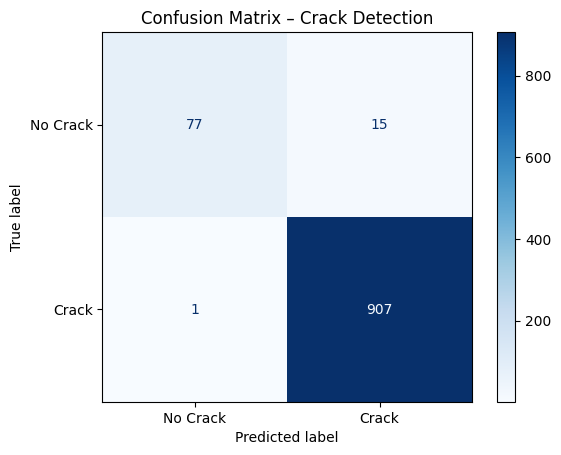

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred,
    display_labels=["No Crack", "Crack"],
    cmap="Blues",
    values_format="d"
)
plt.title("Confusion Matrix – Crack Detection")
plt.show()

In [29]:
from detectron2.utils.visualizer import Visualizer, ColorMode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def draw_prediction(img, outputs):
    v = Visualizer(
        img[:, :, ::-1],
        metadata=crack_metadata,
        scale=0.8,
        instance_mode=ColorMode.IMAGE
    )
    return v.draw_instance_predictions(outputs["instances"].to("cpu")).get_image()

In [30]:
import random
import numpy as np
import cv2

crack_samples = []

threshold = cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST

# Lọc các ảnh có nhãn crack (ground truth) trong validation
candidate_dicts = [d for d in val_dicts if len(d.get("annotations", [])) > 0]

random.shuffle(candidate_dicts)

for d in candidate_dicts:
    if len(crack_samples) >= 20:   # 🔹 ĐỔI THÀNH 20 CẶP
        break

    img_path = d["file_name"]
    img = cv2.imread(img_path)
    if img is None:
        continue

    outputs = predictor(img)
    scores = outputs["instances"].scores.detach().cpu().numpy()

    # chỉ chọn ảnh mà mô hình thật sự phát hiện crack
    if np.sum(scores >= threshold) == 0:
        continue

    crack_samples.append((img, outputs, img_path))

print("Đã chọn được", len(crack_samples), "ảnh có nứt rõ ràng.")


Đã chọn được 20 ảnh có nứt rõ ràng.


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer, ColorMode

# Hàm vẽ bbox + mask
def draw_prediction(image_bgr, outputs):
    visualizer = Visualizer(
        image_bgr[:, :, ::-1],
        metadata=crack_metadata,
        scale=0.8,
        instance_mode=ColorMode.IMAGE_BW
    )
    out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    result_rgb = out.get_image()
    return cv2.cvtColor(result_rgb, cv2.COLOR_RGB2BGR)

# Tạo thư mục lưu
save_dir = "/content/drive/MyDrive/BKAI_Results/sample_pairs_crack_20"
os.makedirs(save_dir, exist_ok=True)
print("Folder lưu ảnh:", save_dir)

# crack_samples phải là list các (img, outputs, img_path)
# Ví dụ tạo 520 ảnh mẫu:
crack_samples = []
sample_paths = sorted(os.listdir("/content/Concrete-Crack-7/test"))[:30]
for name in sample_paths:
    path = f"/content/Concrete-Crack-7/test/{name}"
    img = cv2.imread(path)
    outputs = predictor(img)
    crack_samples.append((img, outputs, path))

# Vẽ & lưu từng cặp ảnh
for idx, (img, outputs, img_path) in enumerate(crack_samples, start=1):

    before_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    after_rgb = draw_prediction(img.copy(), outputs)

    h, w, _ = before_rgb.shape
    after_rgb_resized = cv2.resize(after_rgb, (w, h))

    pair_rgb = np.concatenate([before_rgb, after_rgb_resized], axis=1)

    # Lưu file BGR
    pair_bgr = cv2.cvtColor(pair_rgb, cv2.COLOR_RGB2BGR)
    save_path = os.path.join(save_dir, f"crack_pair_{idx:02d}.png")
    cv2.imwrite(save_path, pair_bgr)

    print(f"Đã lưu cặp {idx}:", save_path)

    # Hiển thị
    plt.figure(figsize=(12, 5))
    plt.imshow(pair_rgb)
    plt.title(f"Crack Pair {idx}")
    plt.axis("off")
    plt.show()


ModuleNotFoundError: No module named 'detectron2'

In [33]:
# ==============================================
# ĐÁNH GIÁ TỔNG HỢP MASK R-CNN + RESNET50
# - COCO mAP: AP, AP50, AP75 (bbox + segm)
# - F1, Precision, Recall
# - Confusion Matrix (bảng rõ ràng)
# ==============================================
import os
import cv2
import numpy as np
import pandas as pd

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader, DatasetCatalog
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

print("===== 1. TÍNH COCO mAP (bbox + segm) TRÊN TẬP crack_val =====")

# COCO mAP
evaluator = COCOEvaluator(
    "crack_val",
    cfg,
    distributed=False,                                # Colab 1 GPU
    output_dir=os.path.join(cfg.OUTPUT_DIR, "coco")   # nơi lưu file COCO
)

val_loader = build_detection_test_loader(cfg, "crack_val")
coco_results = inference_on_dataset(trainer.model, val_loader, evaluator)

# Lấy AP, AP50, AP75 cho bbox + segm
bbox_ap   = coco_results.get("bbox", {})
segm_ap   = coco_results.get("segm", {})

map_table = pd.DataFrame(
    {
        "AP":   [bbox_ap.get("AP",   None), segm_ap.get("AP",   None)],
        "AP50":[bbox_ap.get("AP50", None), segm_ap.get("AP50", None)],
        "AP75":[bbox_ap.get("AP75", None), segm_ap.get("AP75", None)],
    },
    index=["BBox", "Segm"]
)

print("\n>>> BẢNG mAP (COCO):")
print(map_table)

# ==============================================
print("\n===== 2. F1, PRECISION, RECALL & CONFUSION MATRIX (Crack / No Crack) =====")

val_dicts = DatasetCatalog.get("crack_val")
threshold = cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST  # ngưỡng đang dùng

y_true, y_pred = [], []

for d in val_dicts:
    # Ground truth: có annotation => Crack
    has_crack_gt = 1 if len(d.get("annotations", [])) > 0 else 0

    img = cv2.imread(d["file_name"])
    outputs = predictor(img)
    instances = outputs["instances"].to("cpu")

    if len(instances) > 0:
        scores = instances.scores.numpy()
        has_crack_pred = 1 if np.any(scores >= threshold) else 0
    else:
        has_crack_pred = 0

    y_true.append(has_crack_gt)
    y_pred.append(has_crack_pred)

# Tính chỉ số tổng hợp
precision = precision_score(y_true, y_pred, zero_division=0)
recall    = recall_score(y_true, y_pred, zero_division=0)
f1        = f1_score(y_true, y_pred, zero_division=0)

print("\n>>> CHỈ SỐ TỔNG HỢP (Crack = lớp dương):")
summary_table = pd.DataFrame(
    {
        "Precision": [precision],
        "Recall":    [recall],
        "F1-score":  [f1],
    },
    index=["Crack (ảnh có vết nứt)"]
)
print(summary_table)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
cm_table = pd.DataFrame(
    cm,
    index=["GT: No Crack", "GT: Crack"],
    columns=["Pred: No Crack", "Pred: Crack"]
)

print("\n>>> CONFUSION MATRIX (BẢNG):")
print(cm_table)

print("\n>>> BÁO CÁO CHI TIẾT THEO LỚP (sklearn):")
print(classification_report(
    y_true,
    y_pred,
    target_names=["No Crack", "Crack"],
    zero_division=0
))


===== 1. TÍNH COCO mAP (bbox + segm) TRÊN TẬP crack_val =====
WARNING [11/29 02:26:01 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [11/29 02:26:01 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/29 02:26:01 d2.data.datasets.coco]: Loaded 1000 images in COCO format from /content/Concrete-Crack-7/valid/_annotations.coco.json
[11/29 02:26:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/29 02:26:01 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/29 02:26:01 d2.data.common]: Serializing 1000 elements to byte tensors and concatenating them all ...
[11/29 02:26:01 d2.data.common]: Serialized dataset takes 2.92 MiB
[11/29 02:26:01 d2.evaluat

In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt

log_path = f"{cfg.OUTPUT_DIR}/metrics.json"
rows = []
with open(log_path, "r") as f:
    for line in f:
        rows.append(json.loads(line))

df = pd.DataFrame(rows)
print("Các cột có trong log:")
print(df.columns)
df.tail()


Các cột có trong log:
Index(['data_time', 'eta_seconds', 'fast_rcnn/cls_accuracy',
       'fast_rcnn/false_negative', 'fast_rcnn/fg_cls_accuracy', 'iteration',
       'loss_box_reg', 'loss_cls', 'loss_mask', 'loss_rpn_cls', 'loss_rpn_loc',
       'lr', 'mask_rcnn/accuracy', 'mask_rcnn/false_negative',
       'mask_rcnn/false_positive', 'rank_data_time', 'roi_head/num_bg_samples',
       'roi_head/num_fg_samples', 'rpn/num_neg_anchors', 'rpn/num_pos_anchors',
       'time', 'total_loss', 'bbox/AP', 'bbox/AP-Segmentation',
       'bbox/AP-crack', 'bbox/AP50', 'bbox/AP75', 'bbox/APl', 'bbox/APm',
       'bbox/APs', 'segm/AP', 'segm/AP-Segmentation', 'segm/AP-crack',
       'segm/AP50', 'segm/AP75', 'segm/APl', 'segm/APm', 'segm/APs'],
      dtype='object')


,data_time,eta_seconds,fast_rcnn/cls_accuracy,fast_rcnn/false_negative,fast_rcnn/fg_cls_accuracy,iteration,loss_box_reg,loss_cls,loss_mask,loss_rpn_cls,...,bbox/APm,bbox/APs,segm/AP,segm/AP-Segmentation,segm/AP-crack,segm/AP50,segm/AP75,segm/APl,segm/APm,segm/APs
396,0.006378,20.737477,0.968750,0.075714,0.924286,7939,0.161083,0.079874,0.116512,0.007011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,0.005275,13.819327,0.960938,0.155362,0.844638,7959,0.234062,0.086418,0.129018,0.007550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,0.005758,6.908455,0.978516,0.040064,0.959936,7979,0.128904,0.051230,0.142560,0.006683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,0.005493,0.000000,0.978516,0.040000,0.960000,7999,0.098613,0.046755,0.097943,0.008810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,NaN,NaN,NaN,8000,NaN,NaN,NaN,NaN,...,11.473072,3.963358,21.534835,NaN,21.534835,50.776573,17.361836,30.040743,0.724373,0.152183


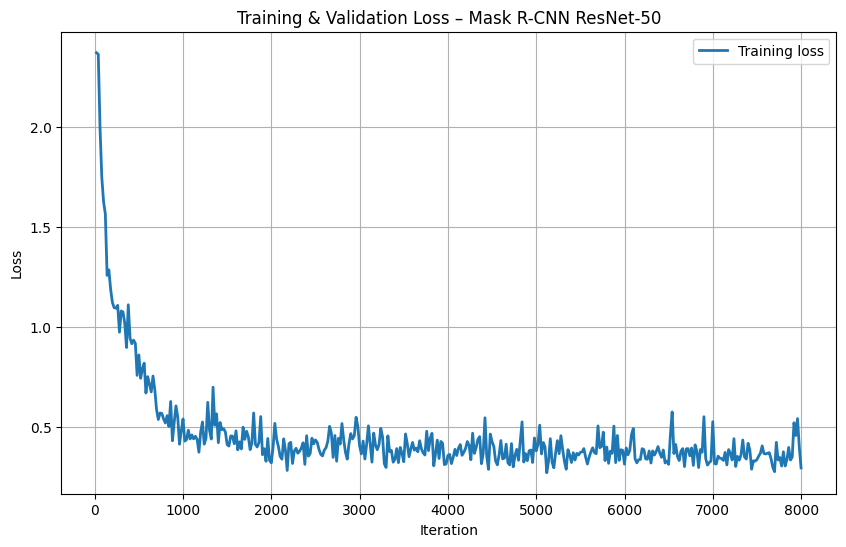

In [37]:
plt.figure(figsize=(10, 6))

# Lọc các dòng có total_loss
train_df = df[df["total_loss"].notna()]

plt.plot(train_df["iteration"], train_df["total_loss"],
         label="Training loss", linewidth=2)

# Validation loss (nếu có)
if "validation_loss" in df.columns:
    val_df = df[df["validation_loss"].notna()]
    plt.plot(val_df["iteration"], val_df["validation_loss"],
             label="Validation loss", linewidth=2)

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training & Validation Loss – Mask R-CNN ResNet-50")
plt.legend()
plt.grid(True)
plt.show()


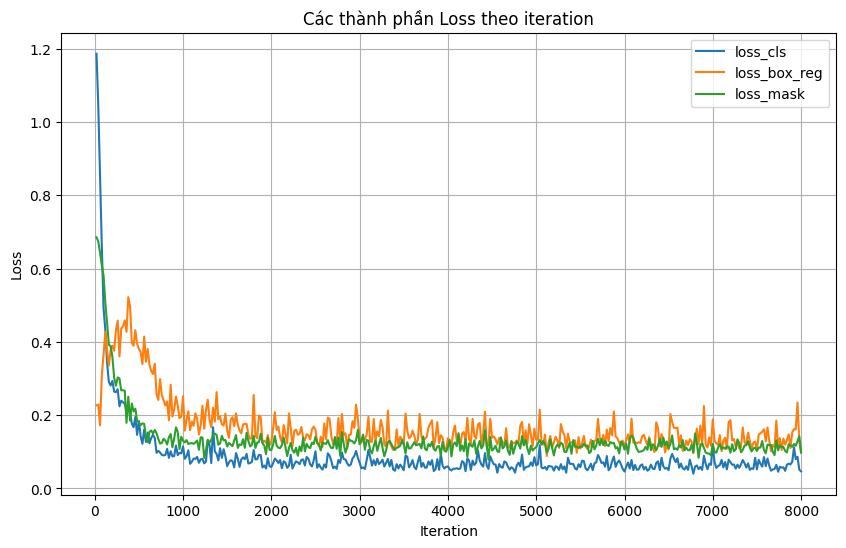

In [38]:
plt.figure(figsize=(10, 6))

for col in ["loss_cls", "loss_box_reg", "loss_mask"]:
    if col in df.columns:
        sub_df = df[df[col].notna()]
        plt.plot(sub_df["iteration"], sub_df[col], label=col)

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Các thành phần Loss theo iteration")
plt.legend()
plt.grid(True)
plt.show()


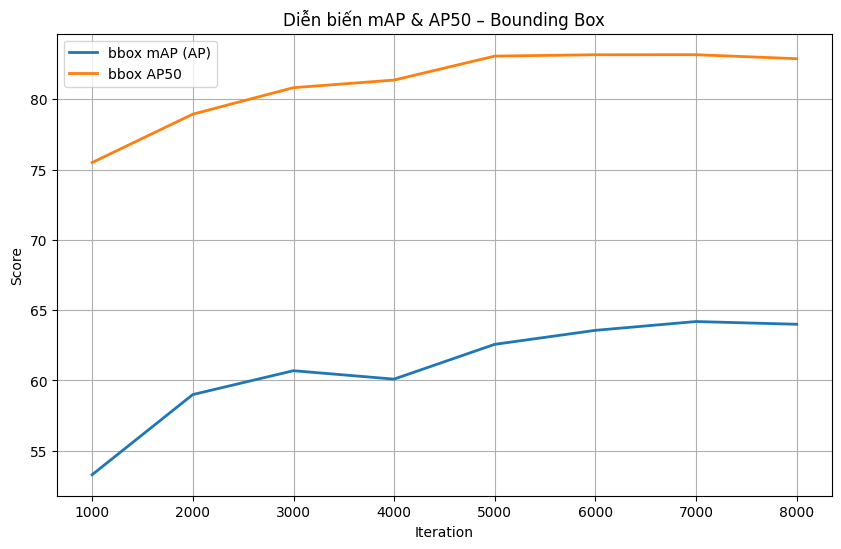

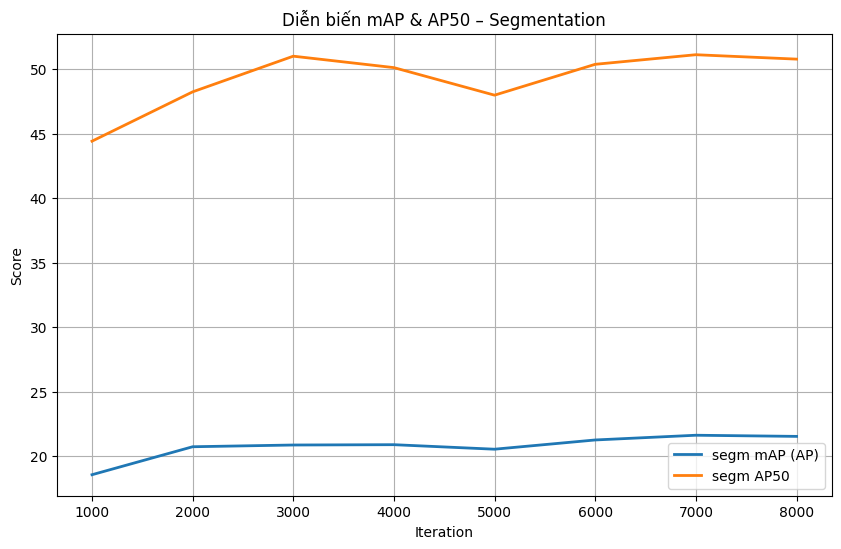

In [39]:
plt.figure(figsize=(10, 6))

if "bbox/AP" in df.columns:
    bdf = df[df["bbox/AP"].notna()]
    plt.plot(bdf["iteration"], bdf["bbox/AP"], label="bbox mAP (AP)", linewidth=2)
if "bbox/AP50" in df.columns:
    bdf50 = df[df["bbox/AP50"].notna()]
    plt.plot(bdf50["iteration"], bdf50["bbox/AP50"], label="bbox AP50", linewidth=2)

plt.xlabel("Iteration")
plt.ylabel("Score")
plt.title("Diễn biến mAP & AP50 – Bounding Box")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))

if "segm/AP" in df.columns:
    sdf = df[df["segm/AP"].notna()]
    plt.plot(sdf["iteration"], sdf["segm/AP"], label="segm mAP (AP)", linewidth=2)
if "segm/AP50" in df.columns:
    sdf50 = df[df["segm/AP50"].notna()]
    plt.plot(sdf50["iteration"], sdf50["segm/AP50"], label="segm AP50", linewidth=2)

plt.xlabel("Iteration")
plt.ylabel("Score")
plt.title("Diễn biến mAP & AP50 – Segmentation")
plt.legend()
plt.grid(True)
plt.show()


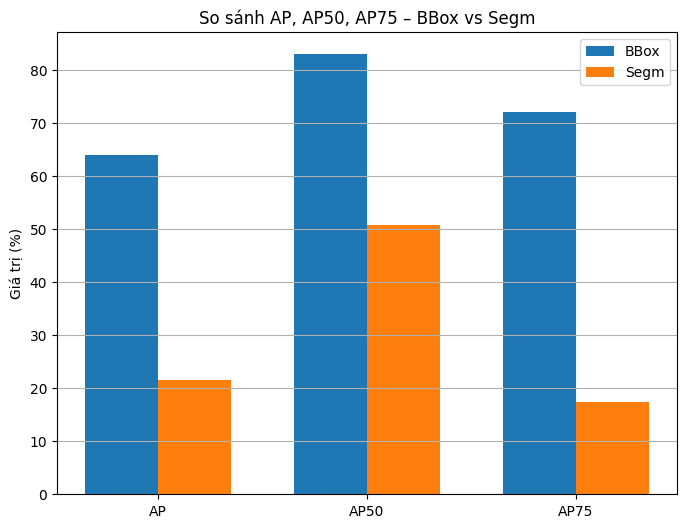

In [40]:
import numpy as np

bbox_ap   = coco_results.get("bbox", {})
segm_ap   = coco_results.get("segm", {})

metrics_names = ["AP", "AP50", "AP75"]
bbox_vals = [bbox_ap.get(m, 0) for m in metrics_names]
segm_vals = [segm_ap.get(m, 0) for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, bbox_vals, width, label="BBox")
plt.bar(x + width/2, segm_vals, width, label="Segm")

plt.xticks(x, metrics_names)
plt.ylabel("Giá trị (%)")
plt.title("So sánh AP, AP50, AP75 – BBox vs Segm")
plt.legend()
plt.grid(axis="y")
plt.show()


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])


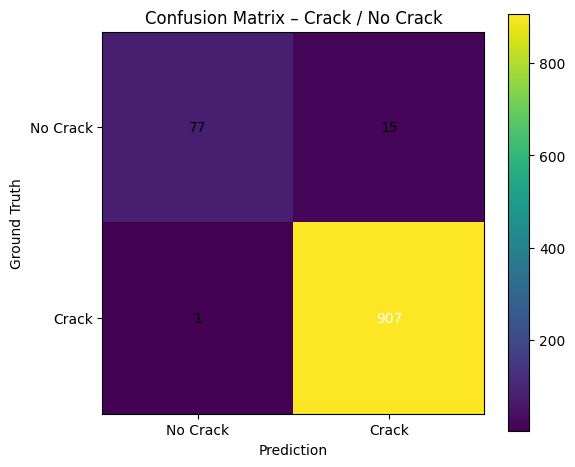

In [42]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["No Crack", "Crack"]

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix – Crack / No Crack")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# In số lên từng ô
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], "d"),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("Ground Truth")
plt.xlabel("Prediction")
plt.tight_layout()
plt.show()


In [43]:
from detectron2.data import DatasetCatalog

val_dicts = DatasetCatalog.get("crack_val")

y_true = []
y_score = []

for d in val_dicts:
    # GT: có annotation => crack
    has_crack_gt = 1 if len(d.get("annotations", [])) > 0 else 0

    img = cv2.imread(d["file_name"])
    outputs = predictor(img)
    instances = outputs["instances"].to("cpu")

    if len(instances) > 0:
        scores = instances.scores.numpy()
        score_max = float(scores.max())
    else:
        score_max = 0.0

    y_true.append(has_crack_gt)
    y_score.append(score_max)

len(y_true), len(y_score)


WARNING [11/29 02:54:35 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/29 02:54:35 d2.data.datasets.coco]: Loaded 1000 images in COCO format from /content/Concrete-Crack-7/valid/_annotations.coco.json


(1000, 1000)

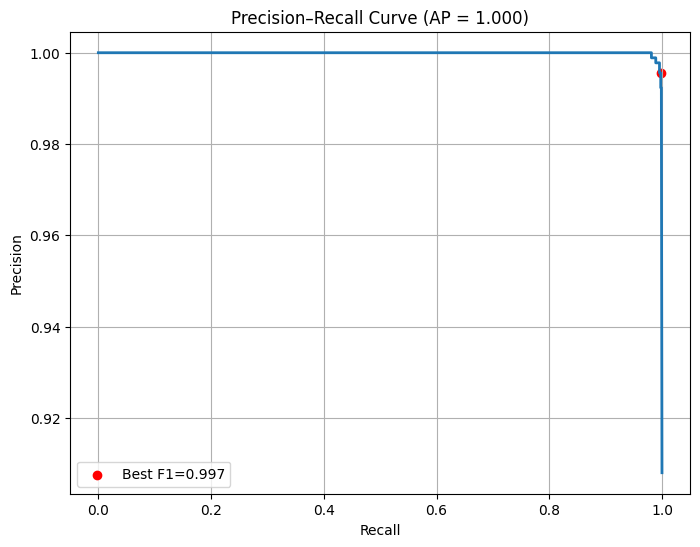

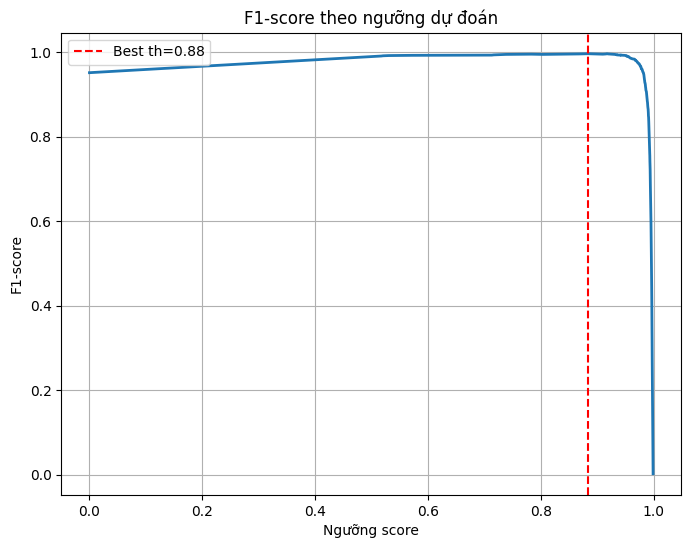

Best F1 = 0.9967 tại ngưỡng ≈ 0.884


In [44]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_true, y_score)
ap = average_precision_score(y_true, y_score)

# F1 theo từng ngưỡng
f1_vals = 2 * precision * recall / (precision + recall + 1e-8)

best_idx = f1_vals.argmax()
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
best_f1 = f1_vals[best_idx]

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.scatter(recall[best_idx], precision[best_idx], color="red", label=f"Best F1={best_f1:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AP = {ap:.3f})")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_vals[:-1], linewidth=2)
plt.axvline(best_threshold, color="red", linestyle="--", label=f"Best th={best_threshold:.2f}")
plt.xlabel("Ngưỡng score")
plt.ylabel("F1-score")
plt.title("F1-score theo ngưỡng dự đoán")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best F1 = {best_f1:.4f} tại ngưỡng ≈ {best_threshold:.3f}")
